In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('/content/coffee_shop_revenue.csv')
dataset.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


In [4]:
vals = dataset["Number_of_Employees"].unique()
vals

array([ 4,  8,  6,  2,  9,  3,  5, 14, 10, 13, 12,  7, 11])

In [5]:
cols_for_clusters = ['Number_of_Customers_Per_Day', 'Average_Order_Value','Operating_Hours_Per_Day','Marketing_Spend_Per_Day', 'Location_Foot_Traffic', 'Daily_Revenue']

df= dataset[cols_for_clusters].copy()

In [7]:
df.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,106.62,97,1547.81
1,485,4.50,12,57.83,744,2084.68
2,398,9.09,6,91.76,636,3118.39
3,320,8.48,17,462.63,770,2912.20
4,156,7.44,17,412.52,232,1663.42


In [8]:
X = df
y = dataset["Number_of_Employees"]

In [9]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA

Метод главных компонентов (Principal Component Analysis, PCA)

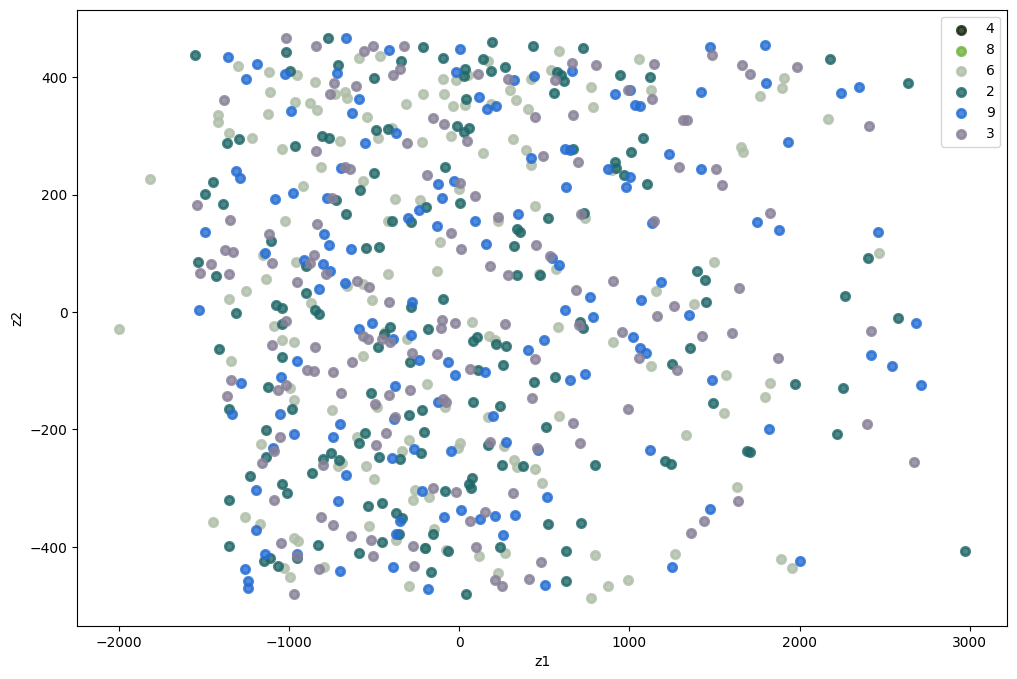

In [10]:
pca = PCA(n_components=4)
X_new = pca.fit(X).transform(X)

plt.figure(figsize=(12,8))
colors = ['#11270b', '#71b340', '#b0bea9', '#216869', '#266dd3', '#888098']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [11]:
pca.explained_variance_ratio_

array([0.9059505 , 0.06939123, 0.01819867, 0.00644729])

Независимый анализ компонентов (Independent Component Analysis, ICA)

In [12]:
from sklearn.decomposition import FastICA

fast_ica = FastICA(n_components=2)
X_new = fast_ica.fit_transform(X)


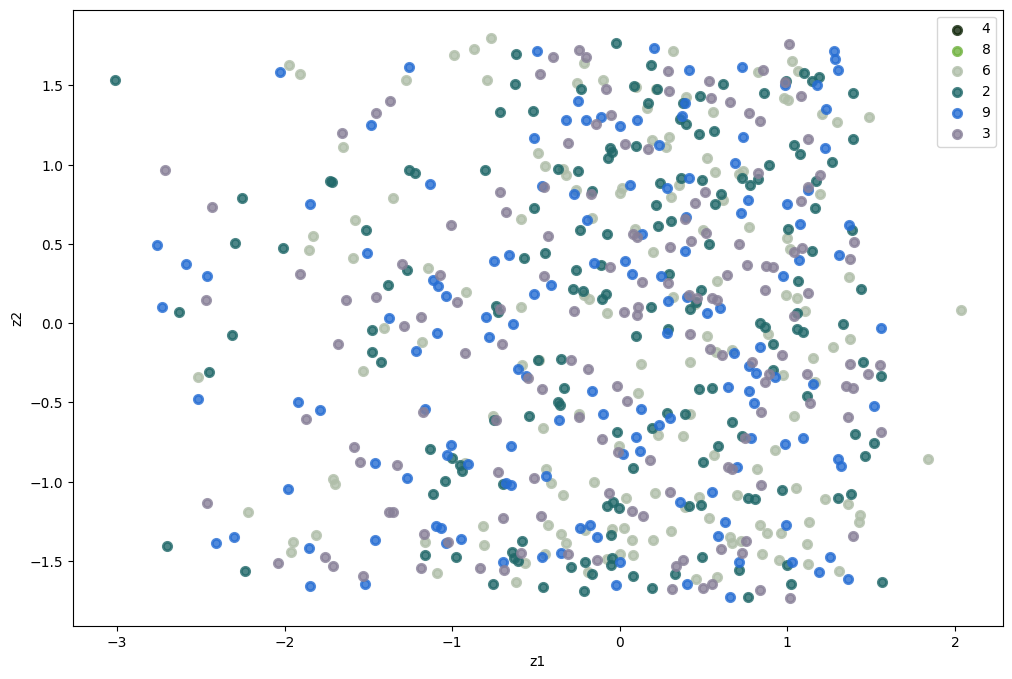

In [13]:
plt.figure(figsize=(12,8))
colors = ['#11270b', '#71b340', '#b0bea9', '#216869', '#266dd3', '#888098']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Kernel PCA

In [14]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
X_new = rbf_pca.fit_transform(X)

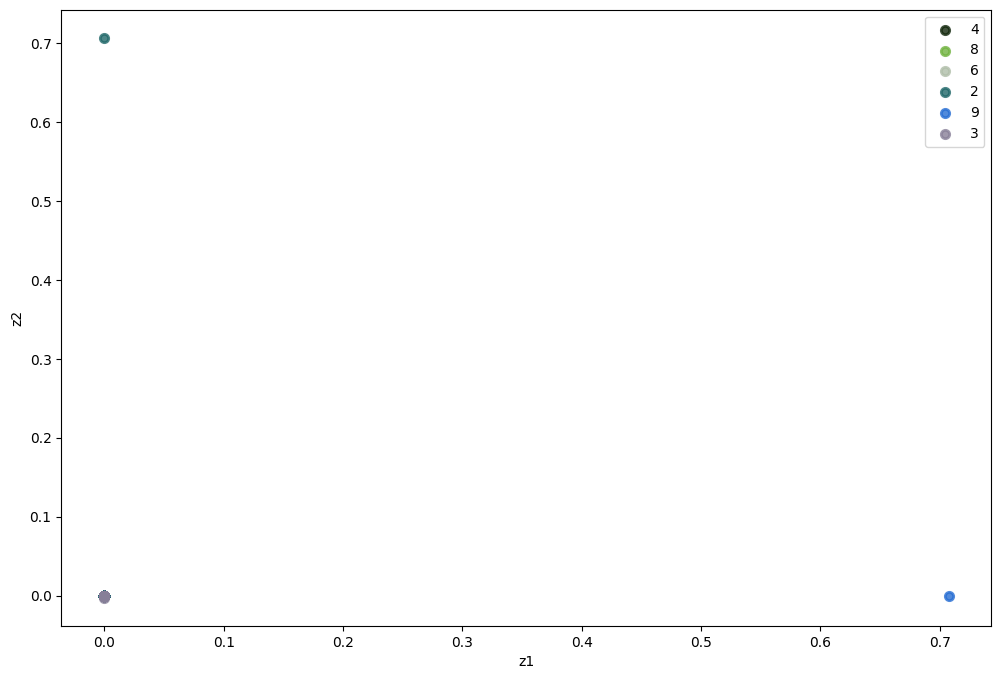

In [15]:
plt.figure(figsize=(12,8))
colors = ['#11270b', '#71b340', '#b0bea9', '#216869', '#266dd3', '#888098']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

tSNE

In [16]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_new = tsne.fit_transform(X)

In [17]:
# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)
#print('Embedding vectors: ', tsne.embedding_)

Initial Shape of X:  (2000, 6)
New Shape of X:  (2000, 2)
Kullback-Leibler divergence after optimization:  0.8607624173164368
No. of iterations:  999


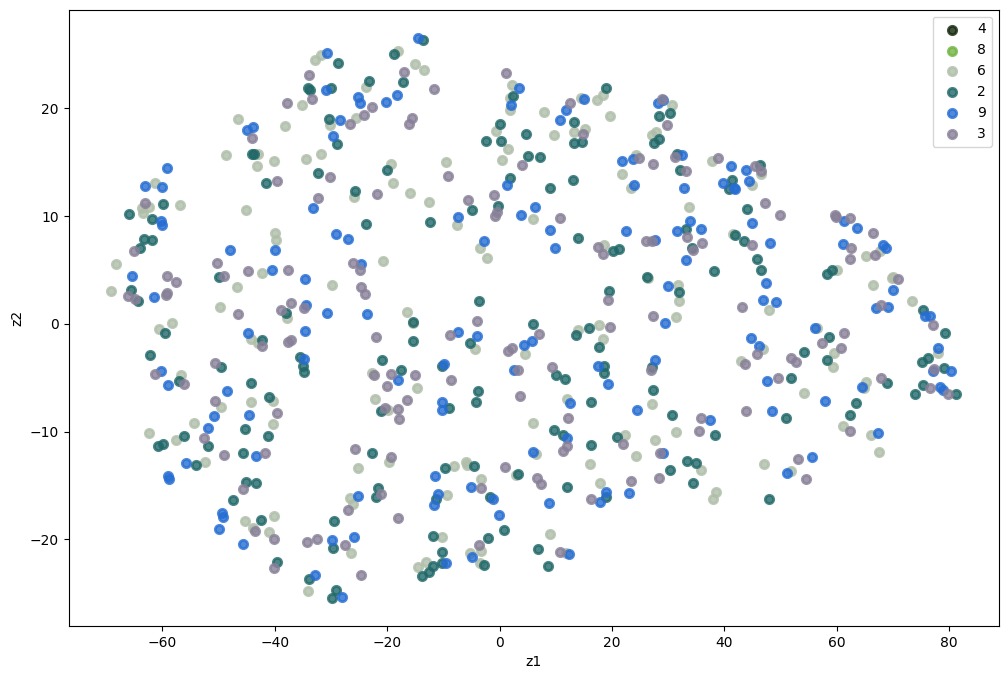

In [18]:
plt.figure(figsize=(12,8))
colors = ['#11270b', '#71b340', '#b0bea9', '#216869', '#266dd3', '#888098']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3, 4, 5], cols_for_clusters):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

Поиск выбросов. DBSCAN

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score


In [20]:
dbscan_cluster1 = DBSCAN(eps = 0.2, min_samples = 9)
dbscan_cluster1.fit(X)

DBSCAN(eps=0.2, min_samples=9)

In [21]:
# Number of Clusters
labels=dbscan_cluster1.labels_

N_clus=len(set(labels))-(1 if -1 in labels else 0)
print(f'Estimated no. of clusters: {N_clus}')

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print(f'Estimated no. of noise points: {n_noise}')

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 0
Estimated no. of noise points: 2000
v_measure = 0.0


<ipython-input-33-47f2a6298b65>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best", shadow=False, scatterpoints=2)


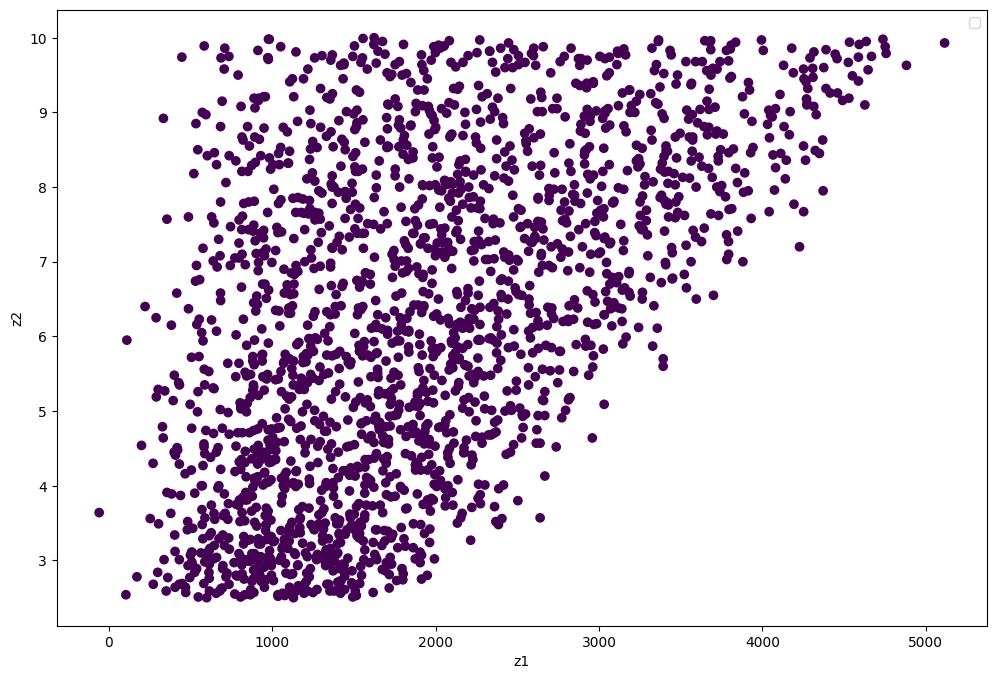

In [33]:
plt.figure(figsize=(12,8))
lw = 2

plt.scatter(
        X['Daily_Revenue'], X['Average_Order_Value'],c=dbscan_cluster1.labels_
    )

plt.legend(loc="best", shadow=False, scatterpoints=2)
plt.xlabel("z1")
plt.ylabel("z2")
plt.show()

In [34]:
from sklearn.neighbors import NearestNeighbors

min_samples = 9

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

In [35]:
import sklearn

sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None)>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

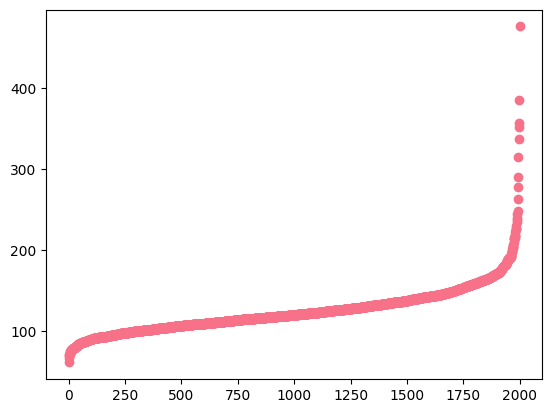

In [36]:
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.show()

In [37]:
dbscan = DBSCAN(eps = 0.1, min_samples = min_samples)
print(dbscan)


DBSCAN(eps=0.1, min_samples=9)


In [38]:
pred = dbscan.fit_predict(X)

In [39]:
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 0
Estimated no. of noise points: 2000
v_measure = 0.0


In [40]:
anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]

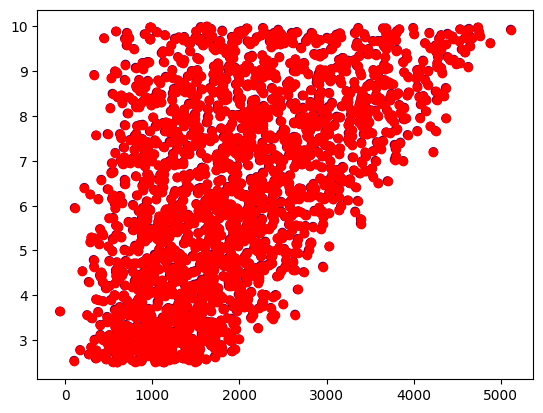

In [41]:

plt.scatter( X['Daily_Revenue'], X['Average_Order_Value'],c=dbscan_cluster1.labels_)
plt.scatter(values['Daily_Revenue'], values['Average_Order_Value'], color='r')
plt.show()
